In this model we will use two famous datasets for heartbeat classification:
* MIT-BIH Arrhythmia Dataset

The datasets contain signals that correspond to the shapes of heartbeats '\n'
obtained by an electrocardiogram (ECG). These signals are preprocessed \n
and segmented so that each segment corresponds to a beat.

**MIT-BIH Arrythmia Dataset**

    Number of Samples: 109446
    Number of Categories: 5
    Sampling Frequency: 125Hz
    Data Source: Physionet's MIT-BIH Arrhythmia Dataset
    Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]


### ECG-CLASSIFICATION OF SIGNALS

### Loading the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight,resample

In [2]:
train_df = pd.read_csv('datasets_ecg/mitbih_train.csv',header=None)
tests_df = pd.read_csv('datasets_ecg/mitbih_test.csv',header=None)

In [3]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [4]:
classes = train_df[187].value_counts()
print(classes)

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


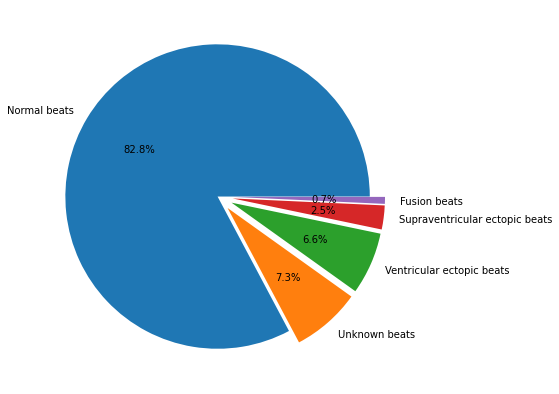

In [5]:
plt.figure(figsize=(7,7))
explode = (0,0.1,0.1,0.1,0.1)
plt.pie(classes,labels=['Normal beats','Unknown beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion beats'], autopct='%1.1f%%', explode=explode)
plt.show()

In [6]:
df_0 = train_df[train_df[187]==0.0].sample(n=16000, random_state=1)
df_1 = train_df[train_df[187]==1.0]
df_2 = train_df[train_df[187]==2.0]
df_3 = train_df[train_df[187]==3.0]
df_4 = train_df[train_df[187]==4.0]
# upsample
df_1_up=resample(df_1, replace=True, n_samples=16000, random_state=1)
df_2_up=resample(df_2, replace=True, n_samples=16000, random_state=1)
df_3_up=resample(df_3, replace=True, n_samples=16000, random_state=1)
df_4_up=resample(df_4, replace=True, n_samples=16000, random_state=1)

train_df = pd.concat([df_0, df_1_up, df_2_up, df_3_up, df_4_up])

In [7]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
65728,1.000000,0.918864,0.567951,0.243408,0.279919,0.310345,0.283976,0.283976,0.277890,0.267748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33224,0.199288,0.074733,0.270463,0.427046,0.551601,0.569395,0.558719,0.565836,0.594306,0.597865,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46733,1.000000,0.929448,0.328221,0.070552,0.205521,0.294479,0.309816,0.319018,0.322086,0.346626,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49665,0.000000,0.059006,0.236025,0.347826,0.434783,0.431677,0.422360,0.437888,0.456522,0.453416,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30911,0.975659,0.872211,0.531440,0.255578,0.184584,0.162272,0.109533,0.113590,0.113590,0.107505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85165,1.000000,0.567164,0.570895,0.585821,0.585821,0.563433,0.574627,0.522388,0.402985,0.298507,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
86756,0.664697,0.589365,0.483013,0.392910,0.273264,0.162482,0.087149,0.031019,0.000000,0.026588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
83845,0.945148,0.518987,0.556962,0.556962,0.544304,0.510549,0.527426,0.459916,0.337553,0.206751,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
83949,1.000000,0.505618,0.535581,0.520599,0.528090,0.524345,0.531835,0.479401,0.404494,0.303371,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [8]:
classes = train_df[187].value_counts()
print(classes)

0.0    16000
1.0    16000
2.0    16000
3.0    16000
4.0    16000
Name: 187, dtype: int64


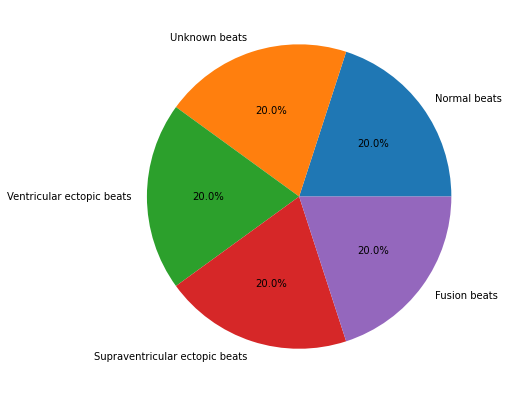

In [9]:
plt.figure(figsize=(7,7))
plt.pie(classes,labels=['Normal beats','Unknown beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion beats'], autopct='%1.1f%%')
plt.show()

### We will analyze some samples of the classes

Text(0, 0.5, 'Magnitude')

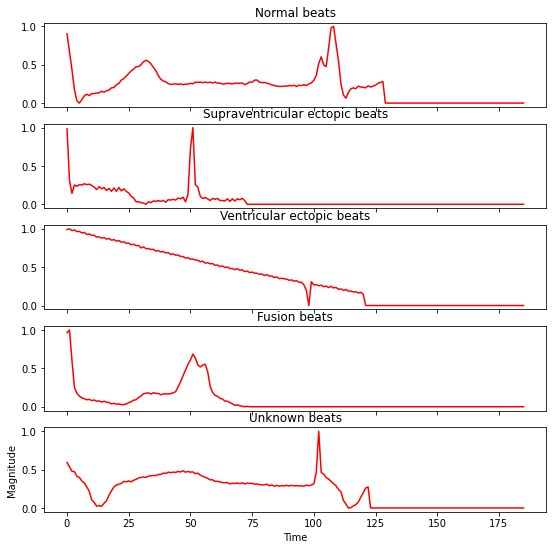

In [10]:
sample_n=df_0.sample(1)
sample_s=df_1.sample(1)
sample_v=df_2.sample(1)
sample_f=df_3.sample(1)
sample_q=df_4.sample(1)

fig,ax = plt.subplots(5,sharex=True,sharey=True)
fig.set_size_inches(9,9)

ax[0].plot(sample_n.iloc[0,:186], color='red')
ax[0].set_title("Normal beats")
ax[1].plot(sample_s.iloc[0,:186], color='red')
ax[1].set_title("Supraventricular ectopic beats")
ax[2].plot(sample_v.iloc[0,:186], color='red')
ax[2].set_title("Ventricular ectopic beats")
ax[3].plot(sample_f.iloc[0,:186], color='red')
ax[3].set_title("Fusion beats")
ax[4].plot(sample_q.iloc[0,:186], color='red')
ax[4].set_title("Unknown beats")
plt.xlabel('Time')
plt.ylabel('Magnitude')


### Data preprocessing

In [11]:
Y_train = to_categorical(train_df[187])
Y_tests = to_categorical(tests_df[187])

X_train = train_df.iloc[:,:186].values
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_tests = tests_df.iloc[:,:186].values
X_tests = X_tests.reshape(len(X_tests), X_tests.shape[1],1)

### Convolutional neural network

In [12]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import History 

history = History()
Model = Sequential()
Model.add(Conv1D(128,3,
                 input_shape=(X_train.shape[1],1),
                 activation='relu'))

Model.add(BatchNormalization())
Model.add(MaxPooling1D(pool_size=2))

Model.add(Conv1D(64,3, activation='relu'))
Model.add(BatchNormalization())
Model.add(MaxPooling1D(pool_size=2))

Model.add(Conv1D(64,2, activation='relu'))
Model.add(BatchNormalization())
Model.add(MaxPooling1D(pool_size=2))

Model.add(Conv1D(64,2, activation='relu'))

Model.add(Flatten())

Model.add(Dense(128, activation='relu'))

Model.add(Dropout(0.5))

Model.add(Dense(64,  activation='relu'))

Model.add(Dense(5,activation='softmax'))

### Training the Model

In [13]:
Model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=8), 
    ModelCheckpoint(filepath='./best_weights.h5', monitor='val_loss', save_best_only=True)
]

In [14]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 184, 128)          512       
                                                                 
 batch_normalization (BatchN  (None, 184, 128)         512       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 92, 128)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 90, 64)            24640     
                                                                 
 batch_normalization_1 (Batc  (None, 90, 64)           256       
 hNormalization)                                                 
                                                        

In [15]:
eps = 12
bts = 32

history = Model.fit(X_train, Y_train, 
          epochs=eps, callbacks=callbacks,
          batch_size=bts, validation_data=(X_tests,Y_tests))

Epoch 1/12
2500/2500 [==============================] - 93s 37ms/step - loss: 0.3396 - accuracy: 0.8755 - val_loss: 0.3401 - val_accuracy: 0.8919
Epoch 2/12
2500/2500 [==============================] - 97s 39ms/step - loss: 0.1640 - accuracy: 0.9413 - val_loss: 0.2383 - val_accuracy: 0.9159
Epoch 3/12
2500/2500 [==============================] - 96s 39ms/step - loss: 0.1154 - accuracy: 0.9588 - val_loss: 0.1704 - val_accuracy: 0.9416
Epoch 4/12
2500/2500 [==============================] - 95s 38ms/step - loss: 0.0922 - accuracy: 0.9669 - val_loss: 0.1604 - val_accuracy: 0.9468
Epoch 5/12
2500/2500 [==============================] - 91s 36ms/step - loss: 0.0754 - accuracy: 0.9740 - val_loss: 0.1387 - val_accuracy: 0.9572
Epoch 6/12
2500/2500 [==============================] - 92s 37ms/step - loss: 0.0653 - accuracy: 0.9773 - val_loss: 0.1288 - val_accuracy: 0.9619
Epoch 7/12
2500/2500 [==============================] - 93s 37ms/step - loss: 0.0581 - accuracy: 0.9804 - val_loss: 0.1554 -

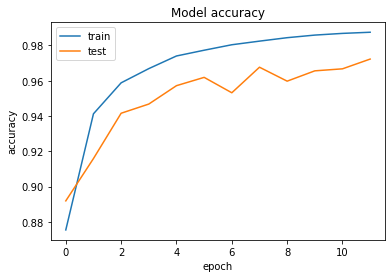

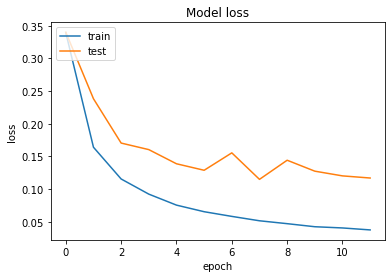

In [16]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Testing the Model

In [17]:
loss,accuracy = Model.evaluate(X_tests,Y_tests,verbose=1)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_predict = Model.predict(X_tests)

685/685 [==============================] - 5s 8ms/step - loss: 0.1169 - accuracy: 0.9723
Test loss: 0.1168890967965126
Test accuracy: 0.9722729921340942
685/685 [==============================] - 5s 7ms/step


In [18]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


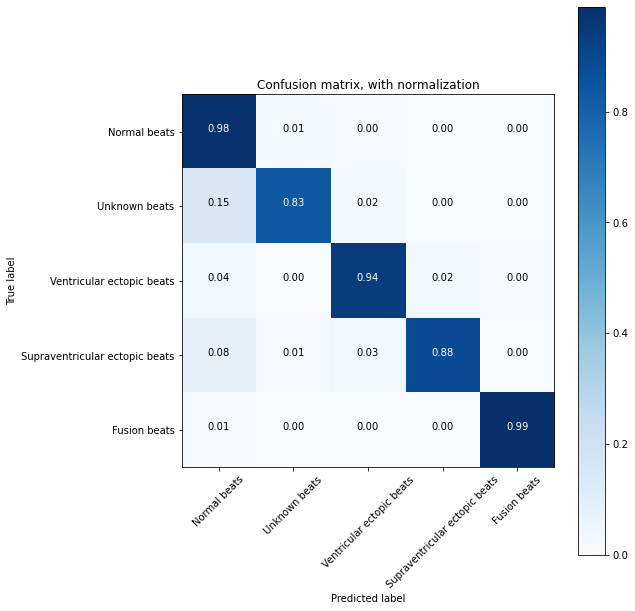

In [19]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(9, 9))
cf_matrix = confusion_matrix(Y_tests.argmax(axis=1),y_predict.argmax(axis=1))
plot_confusion_matrix(cf_matrix, 
                      classes=['Normal beats','Unknown beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion beats'],
                      normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()

### Save the model

In [20]:
Model.save('./ecg_model.h5')
Model.save_weights('./ecg_weights.h5')

### Performing prediction

In [21]:
def printPrediction(max_value):
    if(max_value==0):
        print("Non-Ectopic Beats")
    elif(max_value==1):
        print("Supraventricular Ectopic Beats")
    elif(max_value==2):
        print("Ventricular Ectopic Beats")
    elif(max_value==3):
        print("Fusion Beats")
    else:
        print("Unknown Beats")

In [22]:
my_list = []
prediction  = Model.predict(np.array([X_train[25000]])).tolist()

for it in prediction:
    for el in it:
        my_list.append(el)
        
print(my_list)        
max_value = my_list.index(max(my_list))

if(max_value==0):
    print("Normal Beats")
elif(max_value==1):
    print("Supraventricular Ectopic Beats")
elif(max_value==2):
    print("Ventricular Ectopic Beats")
elif(max_value==3):
    print("Fusion Beats")
else:
    print("Unknown Beats")

1/1 [==============================] - 0s 16ms/step
[0.002719925483688712, 0.9972800016403198, 6.1388143457463684e-09, 1.92232962709061e-15, 2.951333066825157e-10]
Supraventricular Ectopic Beats


### ECG classification with noise

Train Neural Networks With Noise to Reduce Overfitting

In [23]:
gauss_std=0.5
gauss_k=0.1

# Gaussian noise in train_df
x_noise_train = train_df.iloc[:,:186].values.copy()
for i in range(len(x_noise_train)):
    x_noise_train[i,:186]=x_noise_train[i,:186]+gauss_k*np.random.normal(0,gauss_std,186)

x_noise_train_graph=x_noise_train
x_noise_train = x_noise_train.reshape(
    len(x_noise_train),
    x_noise_train.shape[1],1)

# Gaussian noise in tests_df
x_noise_tests = tests_df.iloc[:,:186].values.copy()
for i in range(len(x_noise_tests)):
    x_noise_tests[i,:186]=x_noise_tests[i,:186]+gauss_k*np.random.normal(0,gauss_std,186)

x_noise_tests_graph=x_noise_tests
x_noise_tests = x_noise_tests.reshape(
    len(x_noise_tests),
    x_noise_tests.shape[1],1)

In [24]:
loss,accuracy = Model.evaluate(x_noise_train,Y_train,verbose=1)

print('Noise Test loss:', loss)
print('Noise Test accuracy:', accuracy)

y_noise_predict = Model.predict(x_noise_train)

2500/2500 [==============================] - 17s 7ms/step - loss: 2.3764 - accuracy: 0.6757
Noise Test loss: 2.3764209747314453
Noise Test accuracy: 0.6756500005722046
2500/2500 [==============================] - 17s 7ms/step


Normalized confusion matrix


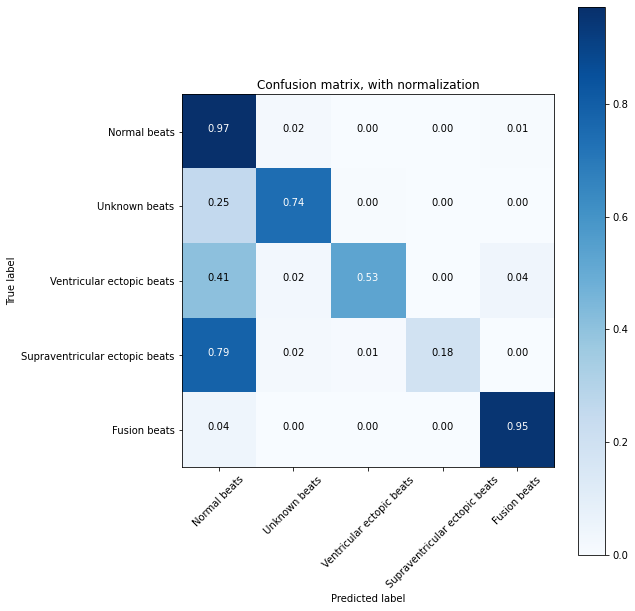

In [25]:
plt.figure(figsize=(9, 9))

cf_matrix_noise = confusion_matrix(Y_train.argmax(axis=1),y_noise_predict.argmax(axis=1))
plot_confusion_matrix(cf_matrix_noise,
                      classes=['Normal beats','Unknown beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion beats'],
                      normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()

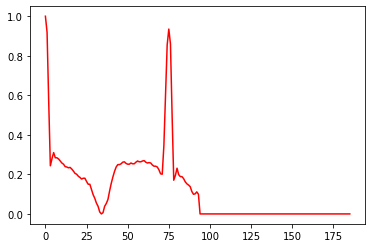

In [26]:
plt.plot(train_df.iloc[0,:186], color='red')
plt.show()

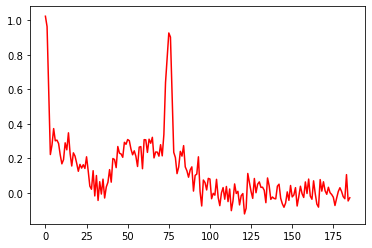

In [27]:
plt.plot(x_noise_train_graph[0], color='red')
plt.show()

### Applying Transfer Learning

In [28]:
from keras.models import load_model

Model_transfer = load_model('./ecg_model.h5')
Model_transfer.load_weights('./ecg_weights.h5')

Model_transfer.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 184, 128)          512       
                                                                 
 batch_normalization (BatchN  (None, 184, 128)         512       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 92, 128)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 90, 64)            24640     
                                                                 
 batch_normalization_1 (Batc  (None, 90, 64)           256       
 hNormalization)                                                 
                                                        

In [29]:
Model_transfer.trainable = False
Model_transfer.pop()

In [30]:
Model2 = Sequential()
Model2.add(Model_transfer)
Model2.add(Dense(64, activation='relu'))
Model2.add(Dropout(0.25))
Model2.add(Dense(5, activation='softmax'))

Model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 64)                223104    
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 5)                 325       
                                                                 
Total params: 227,589
Trainable params: 4,485
Non-trainable params: 223,104
_________________________________________________________________


In [31]:
Model2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',metrics=['accuracy']
)

callbacks2 = [
    EarlyStopping(monitor='val_loss', patience=8), 
    ModelCheckpoint(filepath='./best_noise_weights.h5', monitor='val_loss', save_best_only=True)
]

In [32]:
Model2.fit(x_noise_train,Y_train,
           epochs=10, callbacks=callbacks2, 
           batch_size=32, validation_data=(x_noise_tests,Y_tests))

Epoch 1/10
2500/2500 [==============================] - 22s 9ms/step - loss: 0.6552 - accuracy: 0.7815 - val_loss: 0.6678 - val_accuracy: 0.7633
Epoch 2/10
2500/2500 [==============================] - 22s 9ms/step - loss: 0.5050 - accuracy: 0.8170 - val_loss: 0.5972 - val_accuracy: 0.7745
Epoch 3/10
2500/2500 [==============================] - 22s 9ms/step - loss: 0.4892 - accuracy: 0.8225 - val_loss: 0.6029 - val_accuracy: 0.7705
Epoch 4/10
2500/2500 [==============================] - 22s 9ms/step - loss: 0.4834 - accuracy: 0.8237 - val_loss: 0.6961 - val_accuracy: 0.7173
Epoch 5/10
2500/2500 [==============================] - 22s 9ms/step - loss: 0.4779 - accuracy: 0.8262 - val_loss: 0.7023 - val_accuracy: 0.7148
Epoch 6/10
2500/2500 [==============================] - 22s 9ms/step - loss: 0.4760 - accuracy: 0.8258 - val_loss: 0.6842 - val_accuracy: 0.7386
Epoch 7/10
2500/2500 [==============================] - 22s 9ms/step - loss: 0.4731 - accuracy: 0.8265 - val_loss: 0.5341 - val_ac

### Saving the Model2

In [33]:
Model2.save('./best_noise_model.h5')
Model2.load_weights('./best_noise_weights.h5')

### Performing Fine Turning

In [34]:
from tensorflow.keras.optimizers import Adam

callbacks3 = [
    EarlyStopping(monitor='val_loss', patience=8), 
    ModelCheckpoint(filepath='./best_noise_weights2.h5', monitor='val_loss', save_best_only=True)
]

Model_transfer.trainable = True

Model2.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(0.0001),
    metrics=['accuracy']
)

Model2.fit(x_noise_train,Y_train, 
           epochs=10,callbacks=callbacks3, 
           batch_size=32, validation_data=(x_noise_tests,Y_tests))

Epoch 1/10
2500/2500 [==============================] - 84s 33ms/step - loss: 0.2122 - accuracy: 0.9276 - val_loss: 0.2654 - val_accuracy: 0.9088
Epoch 2/10
2500/2500 [==============================] - 84s 34ms/step - loss: 0.1465 - accuracy: 0.9498 - val_loss: 0.2438 - val_accuracy: 0.9131
Epoch 3/10
2500/2500 [==============================] - 89s 36ms/step - loss: 0.1233 - accuracy: 0.9576 - val_loss: 0.2362 - val_accuracy: 0.9141
Epoch 4/10
2500/2500 [==============================] - 83s 33ms/step - loss: 0.1119 - accuracy: 0.9613 - val_loss: 0.2240 - val_accuracy: 0.9180
Epoch 5/10
2500/2500 [==============================] - 83s 33ms/step - loss: 0.1009 - accuracy: 0.9659 - val_loss: 0.2078 - val_accuracy: 0.9239
Epoch 6/10
2500/2500 [==============================] - 85s 34ms/step - loss: 0.0924 - accuracy: 0.9679 - val_loss: 0.2088 - val_accuracy: 0.9250
Epoch 7/10
2500/2500 [==============================] - 85s 34ms/step - loss: 0.0873 - accuracy: 0.9703 - val_loss: 0.2060 -

### Confusion matrix for noisy signals

685/685 [==============================] - 5s 7ms/step
Normalized confusion matrix


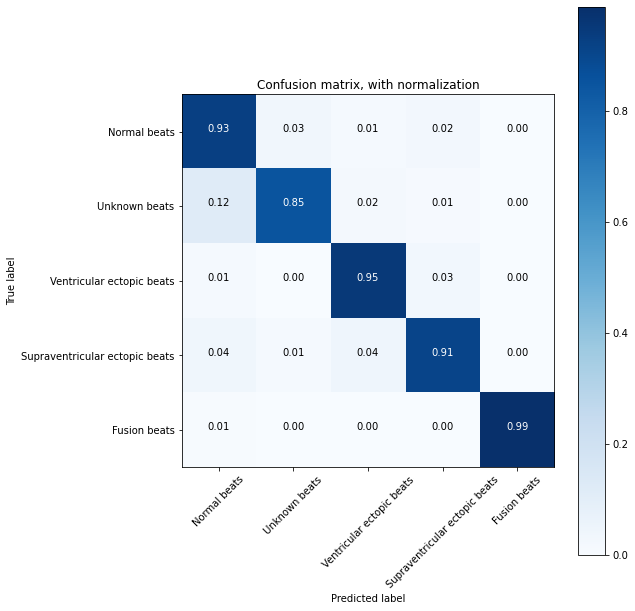

In [35]:
y_noise_predict2 = Model2.predict(x_noise_tests)

plt.figure(figsize=(9,9))
cf_matrix_noise2 = confusion_matrix(Y_tests.argmax(axis=1),y_noise_predict2.argmax(axis=1))
plot_confusion_matrix(cf_matrix_noise2, 
                      classes=['Normal beats','Unknown beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion beats'],
                      normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()

### Confusion matrix for preprocessed signals

685/685 [==============================] - 5s 7ms/step
Normalized confusion matrix


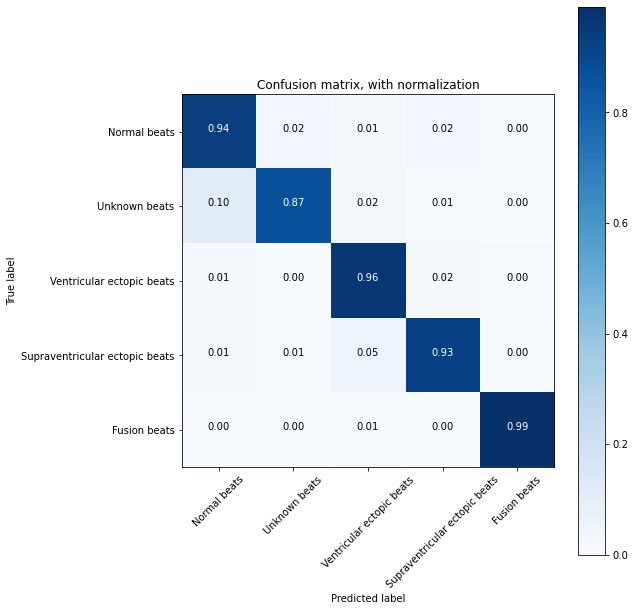

In [36]:
y_predict2 = Model2.predict(X_tests)

plt.figure(figsize=(9,9))
cf_matrix2 = confusion_matrix(Y_tests.argmax(axis=1),y_predict2.argmax(axis=1))
plot_confusion_matrix(cf_matrix2, 
                      classes=['Normal beats','Unknown beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion beats'],
                      normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()